In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = ''
os.chdir(path)

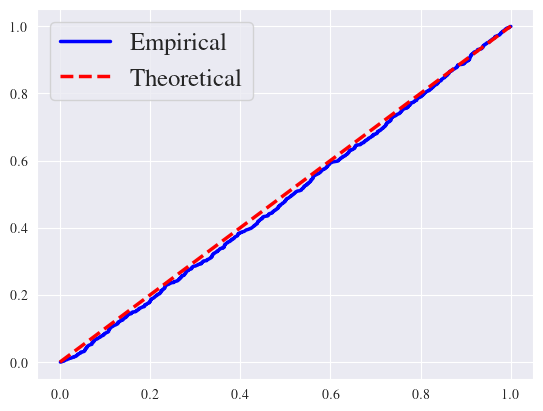

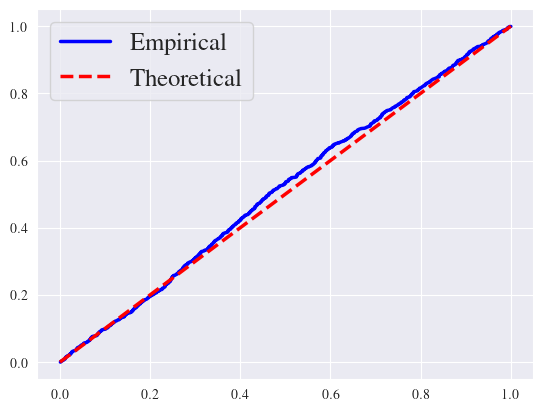

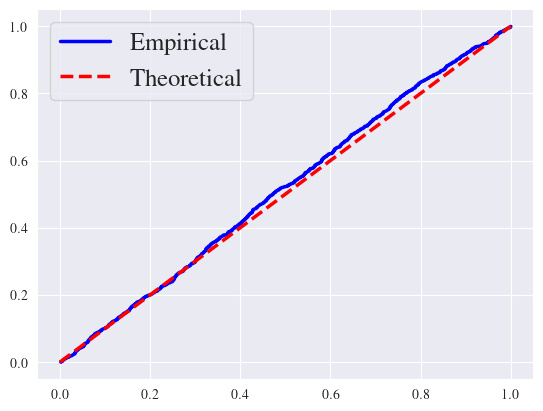

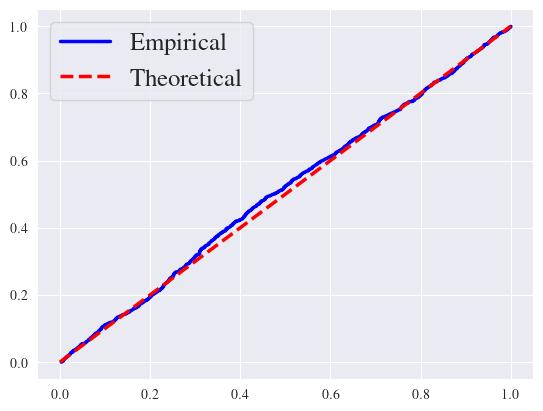

In [26]:
# CDF of P-values under the null
plt.rc('text', usetex=True)
plt.rc('font', family='times')
for n in [50,100,200,300]:
    data = pd.read_csv(f'bootstrap_n={n}_eta=0.0.csv', header=None)
    plt.plot(np.sort(data[0]), np.linspace(0, 1, len(data), endpoint=False), label='Empirical', color='blue', linewidth=2.5)
    plt.plot(np.linspace(0, 1, 1000), np.linspace(0, 1, 1000), label='Theoretical', linestyle='--', color='red', linewidth=2.5)
    plt.legend(fontsize=18)
    plt.savefig(f'cdf{n}.pdf', bbox_inches='tight')
    plt.show()

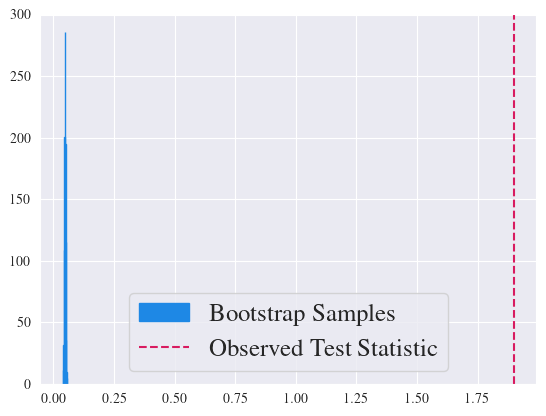

In [27]:
# Global test for Drosophila data
data2 = pd.read_csv('Test_global.csv')

plt.rc('text', usetex=True)
plt.rc('font', family='times')
plt.hist(data2['Bootstrap'], label='Bootstrap Samples', color='#1E88E5', edgecolor='#1E88E5')
plt.axvline(data2['Observed'][0], color='#D81B60', label='Observed Test Statistic', linestyle='--')
plt.legend(fontsize=18, loc='best')
plt.savefig("clayton_global.pdf", bbox_inches='tight')

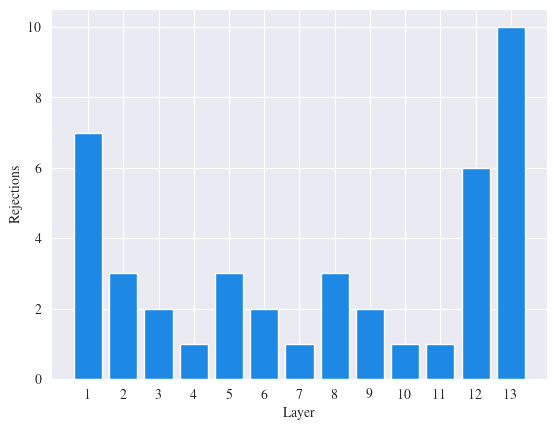

In [28]:
# Pairwise tests for Drosophila data
data3 = pd.read_csv('Test_pairwise_rejections.csv')

plt.rc('text', usetex=True)
plt.rc('font', family='times')

plt.bar(data3['Layer'],data3['Rejections'], color='#1E88E5')
plt.xlabel('Layer')
plt.ylabel('Rejections')
plt.xticks(ticks=np.arange(len(data3['Layer'])) + 1, labels= data3['Layer'])
plt.savefig("ClaytonPairRejection.pdf", bbox_inches='tight')

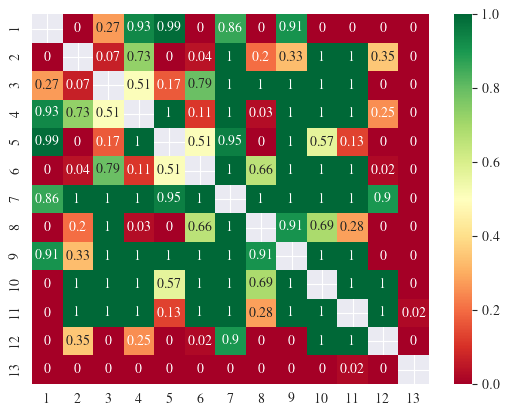

In [29]:
#Heatmap for Drosophila data
path = ''
os.chdir(path)
rejection = np.zeros([13,13])
for i in range(13):
    for j in range(i+1,13):
        data2 = pd.read_csv(f'Test_pairwise_{i}vs{j}.csv')
        observed = data2['Observed'][0]
        pval = (1+sum(observed < data2['Bootstrap']))/(len(data2)+1)
        rejection[i][j] = pval
        rejection[j][i] = pval

for i in range(13):
    rejection[i,i] = None

plt.rc('text', usetex=True)
plt.rc('font', family='times')

plot = sns.heatmap(rejection.round(decimals=2), annot=True, cmap='RdYlGn')

# Adjust tick labels to run from 1–13
plot.set_xticklabels(np.arange(1, rejection.shape[1] + 1))
plot.set_yticklabels(np.arange(1, rejection.shape[0] + 1))

fig = plot.get_figure()
fig.savefig('PairwiseHeatmap.pdf', bbox_inches='tight')